# Hawaii Airbbnb Rental Listings Analysis

I will perform an exploratory analysis of the Airbnb dataset sourced from the Inside Airbnb website to understand the rental landscape in Hawaii through various static and interactive visualisations. The source data is from http://insideairbnb.com/get-the-data.html

Contents includes:

1. load data
3. data cleansing
3. explotaroy analysis
4. data visualization

## Load data

In [1]:
import requests
url = 'http://data.insideairbnb.com/united-states/hi/hawaii/2021-02-10/data/listings.csv.gz'
html = requests.get(url)

# method 1
# with open('listings.csv.gz', 'wb') as r: 
#     r.write(html.content)

# method 2
import wget
wget.download(url)

'listings.csv.gz'

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# pd.set_option('display.max_rows', 10)
from collections import Counter

In [3]:
df = pd.read_csv('listings.csv.gz', compression='gzip', header=0, sep=',', quotechar='"')

In [4]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,5269,https://www.airbnb.com/rooms/5269,20210210181214,2021-02-14,Upcountry Hospitality in the 'Auwai Suite,"The 'Auwai Suite is a lovely, self-contained a...","We are located on the ""sunny side"" of Waimea, ...",https://a0.muscache.com/pictures/5b52b72f-5a09...,7620,https://www.airbnb.com/users/show/7620,...,10.0,10.0,10.0,119-269-5808-01R,f,4,4,0,0,0.09
1,5387,https://www.airbnb.com/rooms/5387,20210210181214,2021-02-14,Hale Koa Studio & 1 Bedroom Units!!,This Wonderful Spacious Studio apt/flat is in ...,IN a Farm belt area with small commercial farm...,https://a0.muscache.com/pictures/1170713/dca6a...,7878,https://www.airbnb.com/users/show/7878,...,10.0,10.0,9.0,NaN,t,3,3,0,0,1.25
2,5389,https://www.airbnb.com/rooms/5389,20210210181214,2021-02-13,Keauhou Villa,It is less than 10 minute walk to the Keauhou ...,It is less than 10 minute walk to the Keauhou ...,https://a0.muscache.com/pictures/15520396/3b89...,7878,https://www.airbnb.com/users/show/7878,...,10.0,10.0,9.0,NaN,f,3,3,0,0,0.26
3,5434,https://www.airbnb.com/rooms/5434,20210210181214,2021-02-13,Kauai Ocean View 3 Story Tiki Tower Princeville,"Hawaiian architecture , post and beam construc...",The resort community of Princeville has many t...,https://a0.muscache.com/pictures/miso/Hosting-...,7984,https://www.airbnb.com/users/show/7984,...,10.0,10.0,9.0,540050300023,f,2,2,0,0,0.78
4,7896,https://www.airbnb.com/rooms/7896,20210210181214,2021-02-13,"Beachfront Maui Sunset Condo, Kihei/Wailea","GREAT VALUE ON THE BEACH! Remodeled Condo, Tas...",Conveniently located to all the sights on the ...,https://a0.muscache.com/pictures/26282/e86e740...,21844,https://www.airbnb.com/users/show/21844,...,10.0,9.0,9.0,Hawaii Tax ID# W59502814-01,f,1,1,0,0,0.22


### Summary of the listing dataset

In [5]:
# summary
print("Rows     :",df.shape[0])
print("Columns  :",df.shape[1])
print("\nFeatures :\n",df.columns.tolist())
print("\nMissing Value    :",df.isnull().sum().sum())
print("\nColumns with missing value:\n",df.isnull().any())

Rows     : 22031
Columns  : 74

Features :
 ['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_

### Data types

In [148]:
df.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
                                                 ...   
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
price_dollar                                    float64
names_without_stopwords                          object
Length: 76, dtype: object

## Data cleansing

In [ ]:
df['price_dollar'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

In [158]:
df.host_since.sort_values()

8581     2008-07-21
8819     2008-07-21
8818     2008-07-21
8816     2008-07-21
8785     2008-07-21
            ...    
21909    2021-02-06
1238            NaN
3563            NaN
8687            NaN
16807           NaN
Name: host_since, Length: 22031, dtype: object

## Exploration Data Analysis and Visualizing
Now time to explore our data and visualize it to recognize the relationship between the dataset.

## Neighbourhood Group

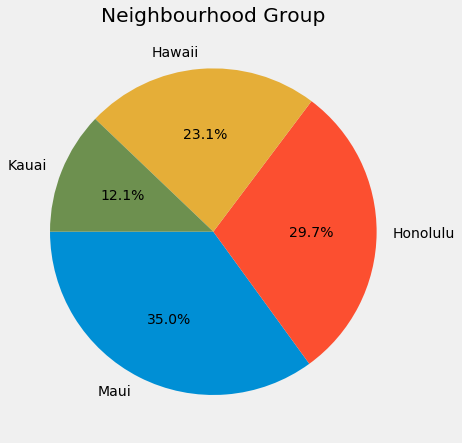

In [6]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group")
g = plt.pie(df.neighbourhood_group_cleansed.value_counts(), labels=df.neighbourhood_group_cleansed.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.show()

The pie chart above shows that Airbnb Listings in Hawaii are in Honolulu, Kauai and Maui, and Maui has the highest share of hotels. We also know that from this map of Neighborhood Group.

## Map of neighbourhood group

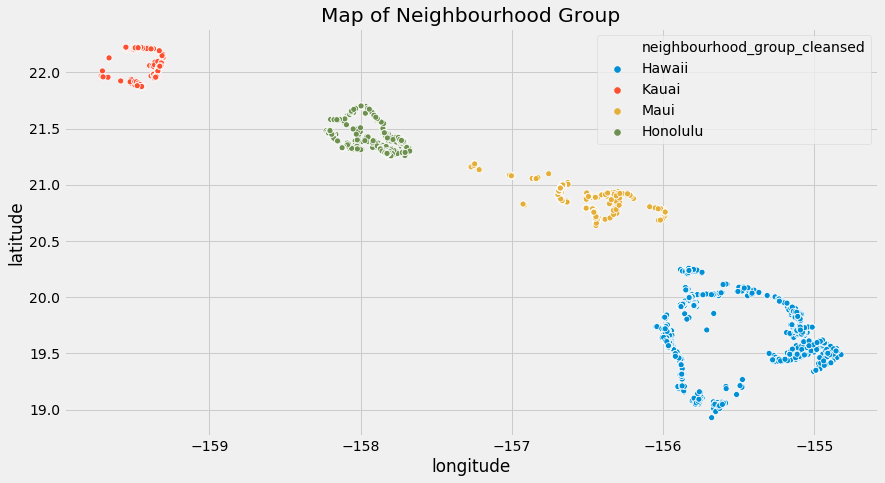

In [8]:
# Map of neighbourhood group
plt.figure(figsize=(13,7))
plt.title("Map of Neighbourhood Group")
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group_cleansed)
plt.ioff()
plt.show()

## Room Type Distribution

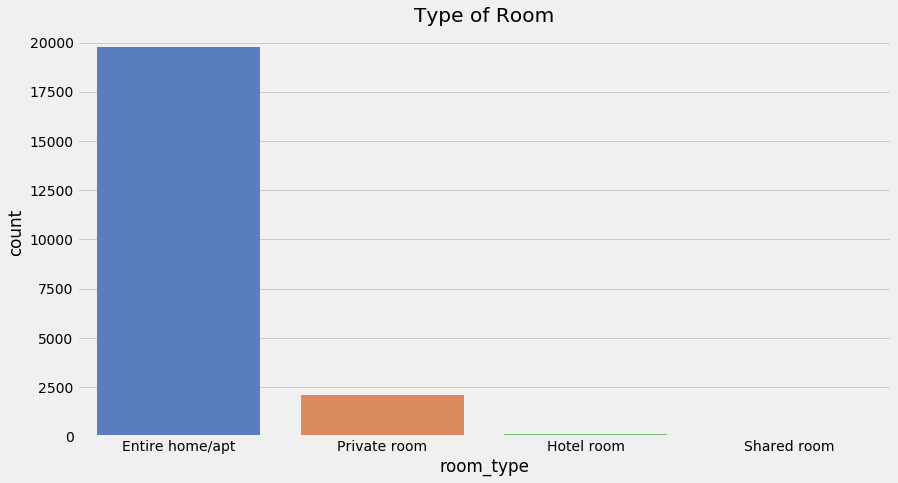

In [23]:
#Room type
from matplotlib import *
import sys
from pylab import *

plt.figure(figsize=(13,7))
plt.title("Type of Room")
sns.countplot(df.room_type, palette="muted")
fig = plt.gcf()
plt.show()

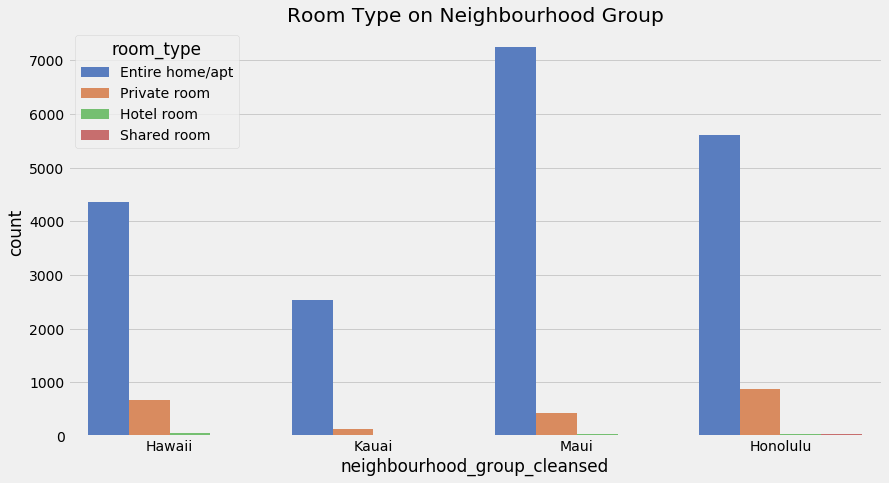

In [25]:
plt.figure(figsize=(13,7))
plt.title("Room Type on Neighbourhood Group")
sns.countplot(df.neighbourhood_group_cleansed,hue=df.room_type, palette="muted")
plt.show()

## Neighbourhood Group Price Distribution


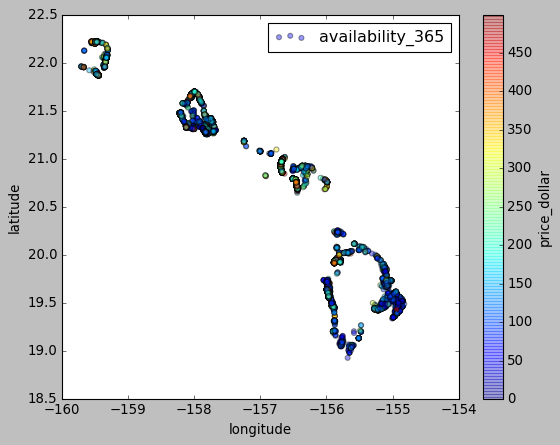

In [43]:
# plt.figure(figsize=(13,7))
# plt.title("Map of Price Distribution")
ax=df[df.price_dollar<500].plot(kind='scatter', x='longitude',y='latitude',label='availability_365',c='price_dollar',cmap=plt.get_cmap('jet'),colorbar=True,alpha=0.4)
ax.legend()
plt.ioff()
plt.show()

In [46]:
# draw boxplot

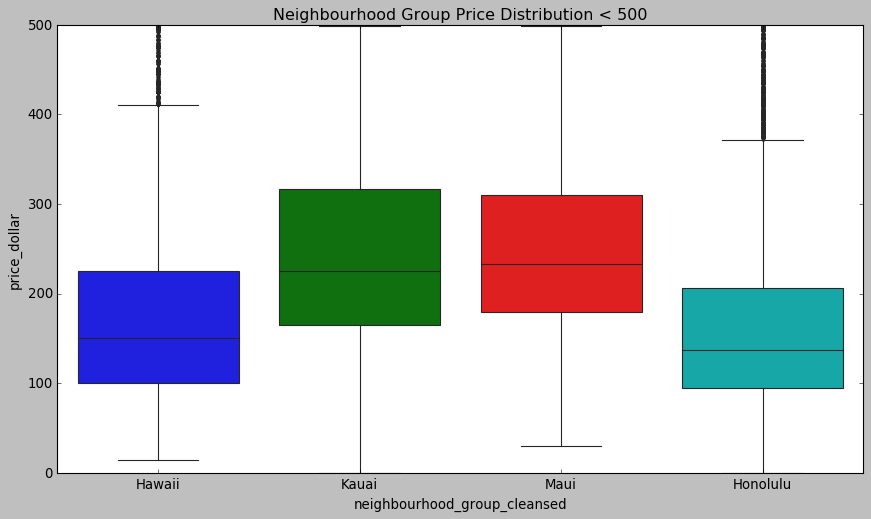

In [31]:
plt.style.use('classic')
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group Price Distribution < 500")
sns.boxplot(y="price_dollar",x ='neighbourhood_group_cleansed' ,data = df[df.price_dollar<500])
plt.show()

From the boxplot above, we can definitely observe a couple of things about the distribution of prices for Airbnb in Hawaii.
We can state that Kauai has the highest range price for the listings with about $160 as an average price, followed by Maui, but this two islands has very similair price range.

Honolulu is the cheapest.

In [56]:
summaryDF = df[['description','price_dollar']]
summaryDF = summaryDF[pd.notnull(summaryDF['description'])]
summaryDF = summaryDF[summaryDF['description']!=0]
summaryDF = summaryDF.sort_values('price_dollar',ascending=[0])
top100DF = summaryDF.head(100)
top100DF.head()

,description,price_dollar
18373,this is a placeholder description and will get...,25000.0
18372,this is a placeholder description and will get...,25000.0
18374,this is a placeholder description and will get...,25000.0
18376,this is a placeholder description and will get...,25000.0
18370,this is a placeholder description and will get...,25000.0


## Top listing words

Next, we will explore deeper on the property detail by finding out what the most used word in the listing name. The most used word could represent the selling value of their property for the prospective guests. First, we will create a function to collect the words.

In [137]:
# Import stopwords with nltk.
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['names_without_stopwords'] = df['name'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df['names_without_stopwords'] 

0                       Upcountry Hospitality 'Auwai Suite
1                      Hale Koa Studio & 1 Bedroom Units!!
2                                            Keauhou Villa
3          Kauai Ocean View 3 Story Tiki Tower Princeville
4               Beachfront Maui Sunset Condo, Kihei/Wailea
                               ...                        
22026    OCEAN VIEW! Lovely Studio Close Kahana Beach |...
22027    Perfect Location! Spacious Getaway Garden View...
22028    Sunny Getaway! Relaxing Villa Garden View | Cl...
22029    Near Waikoloa Beach! Spacious Bright Condo Gol...
22030    Spacious Villa Near Waikoloa Beach | Air-Condi...
Name: names_without_stopwords, Length: 22031, dtype: object

In [138]:
#Crete empty list where we are going to put the name strings
names=[]
#Getting name string from 'name' column and appending it to the empty list
for name in df.names_without_stopwords:
    names.append(name)
#Setting a function to split name strings into seperate words
def split_name(name):
    s = str(name).split()
    return s
#Create empty list where we are going to count the words
names_count = []
#Getting name string to appending it to the names_count list
for n in names:
    for word in split_name(n):
        word = word.lower()
        names_count.append(word)

In [139]:
skip_words = ["&", "1", "2", "3", ",", "w/", "-", "the"]

In [140]:
for n in names_count:
    if n in skip_words:
        names_count.remove(n)

We need to import counter library to count and generate raw data which contains the top 25 words used by the host


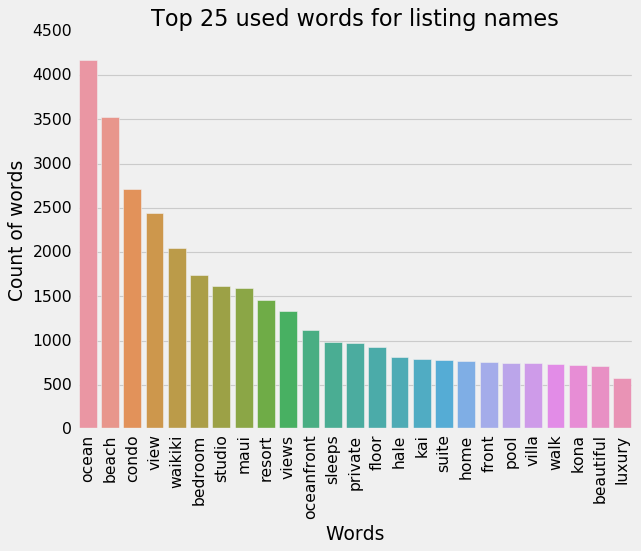

In [141]:
from collections import Counter
top_25 = Counter(names_count).most_common()
top_25 = top_25[:25]

# Then, we convert the data into DataFrame and visualize our findings
word_count_data = pd.DataFrame(top_25)
word_count_data.rename(columns={0:'Words',1:'Counts'},inplace=True)
viz_count = sns.barplot(x='Words',y='Counts', data = word_count_data)
viz_count.set_title('Top 25 used words for listing names')
viz_count.set_ylabel('Count of words')
viz_count.set_xlabel('Words')
viz_count.set_xticklabels(viz_count.get_xticklabels(),rotation = 90);

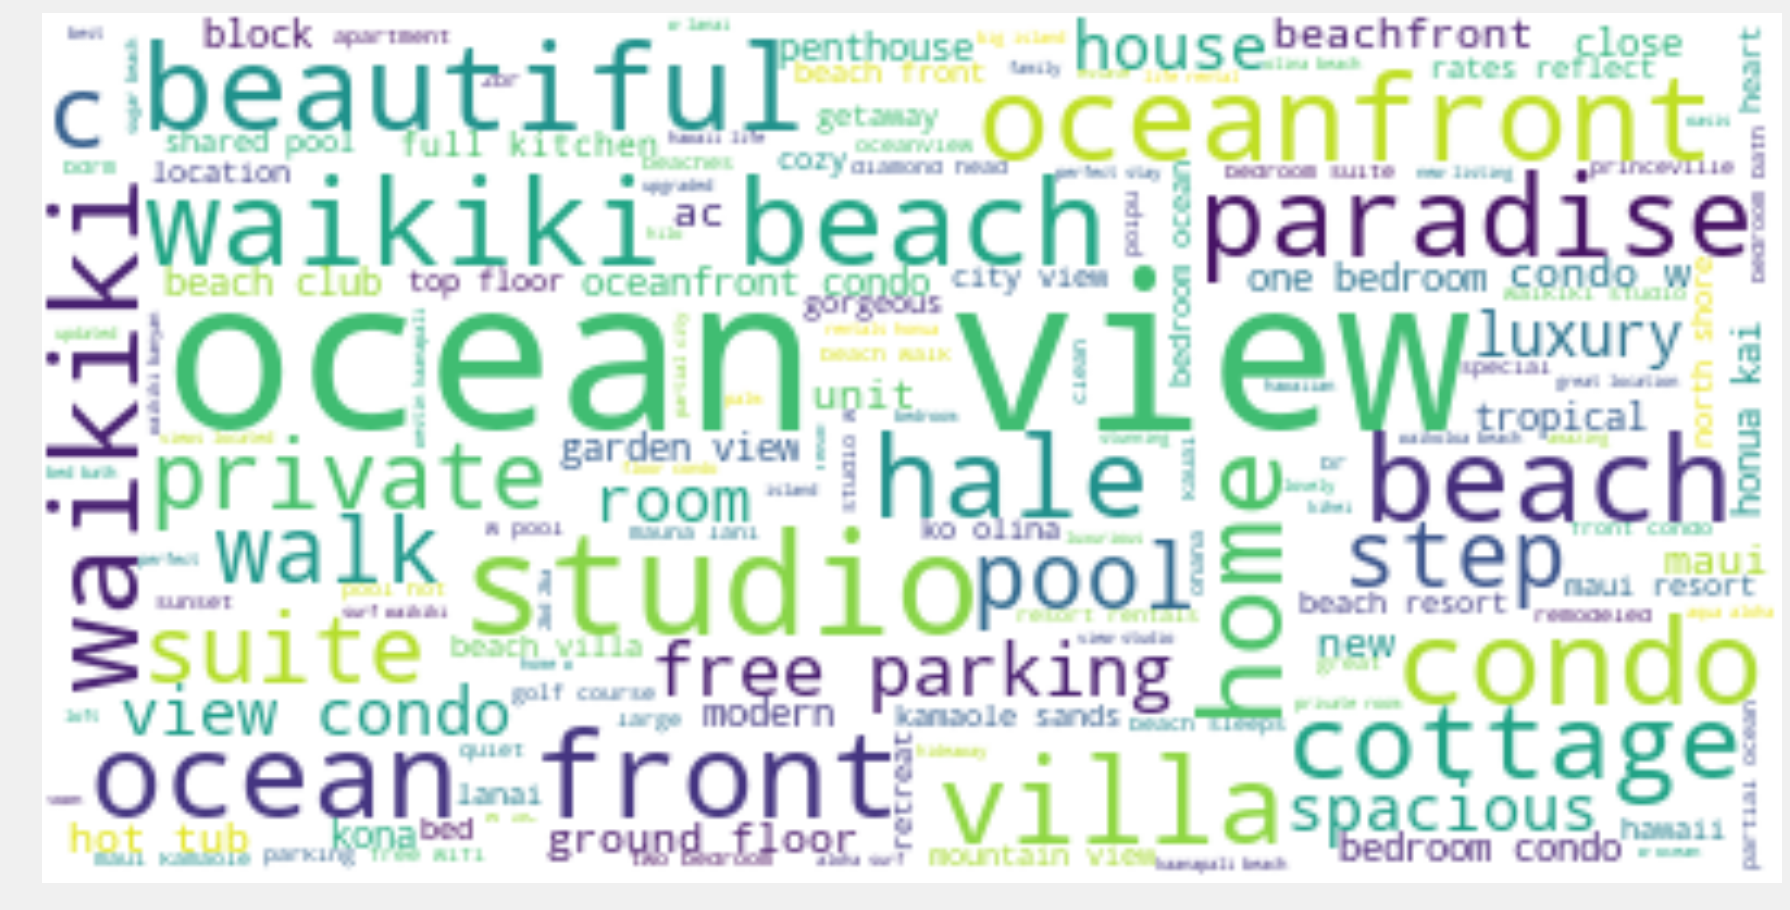

In [142]:
from wordcloud import WordCloud, ImageColorGenerator
text = ' '.join(str(n).lower() for n in df.name)
#Generate wordcloud image
wordcloud = WordCloud(max_words=200, background_color = 'white').generate(text)
plt.figure(figsize=(25,20))
#Display the image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
